# 2.1 Pt 2: Unsupervised Learning Algorithms

In [6]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [8]:
#Import Prediction Data Set - This will be the X axis
df_predict = pd.read_csv('/Users/ariedlin/Desktop/Career Foundry Assignments/Machine Learning/2. Data/Dataset-weather-prediction-dataset-processed.csv')

In [10]:
df_predict.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [12]:
df_predict.shape

(22950, 170)

In [14]:
#Import Prediction Data Set - This will be the X axis
dfPCA = pd.read_csv('/Users/ariedlin/Desktop/Career Foundry Assignments/Machine Learning/2. Data/Unsupervised/dfPCA.csv')
dfPCA.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15
0,-7.250644,3.096082,-0.641841,-3.818087,-0.159803,-1.071728,-1.316419,-1.542071,0.939882,-0.609182,0.808256,-1.160801,0.545440,-1.143527,-0.326267
1,-7.917356,5.157362,1.965073,-3.244997,-0.984028,-1.738072,-0.940327,-0.715562,-0.907398,-1.292840,1.980610,-0.706527,-0.923924,1.570189,-1.654832
2,-9.180032,6.882337,0.024091,-4.631249,-1.189046,-1.311991,0.711140,0.746724,-0.419637,0.009373,1.325618,-0.592289,0.117570,2.848829,-0.694641
3,-10.180826,5.517908,-0.044229,-5.513362,0.293932,-0.299601,-0.264033,1.127923,0.836103,0.902052,1.519001,-0.450763,0.681572,1.149592,-0.254171
4,-9.540872,2.919512,1.071825,-5.767567,0.499239,-1.994010,-0.503847,0.528400,0.542953,-1.069046,0.683609,-1.382883,1.034193,1.063085,-0.491892


In [16]:
dfPCA.shape

(365, 15)

# Dendograms with Reduced PCA data

Single Method

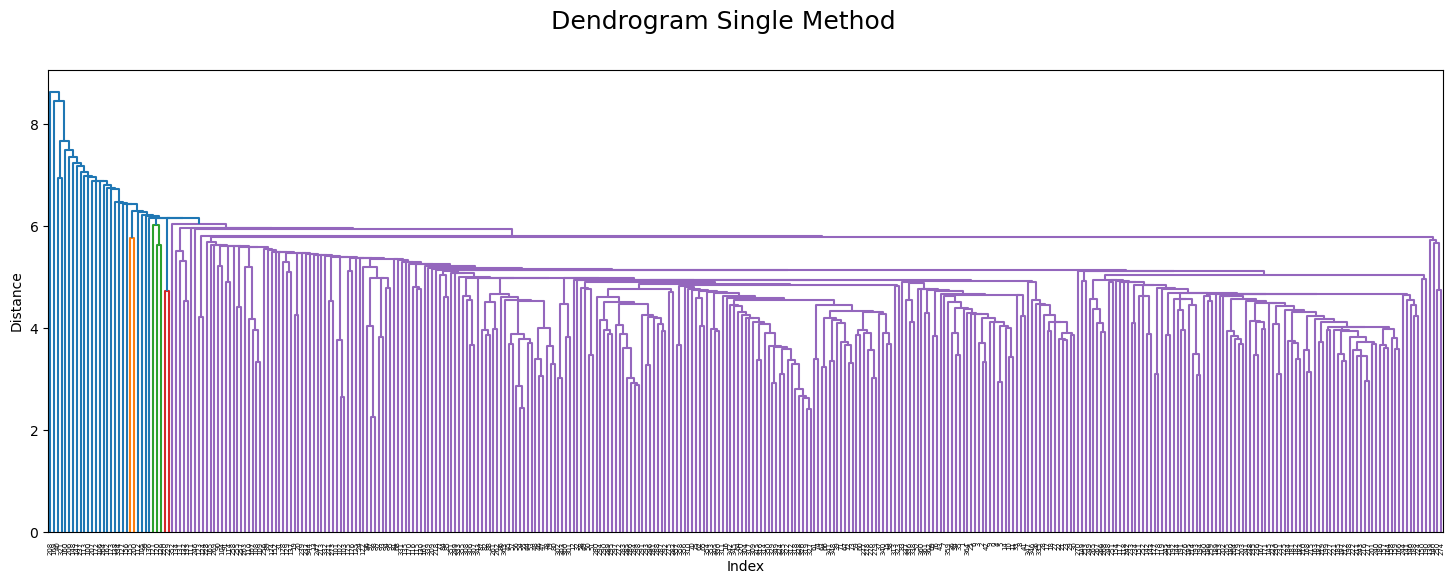

In [20]:
distance_single = linkage(dfPCA.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9',
'PCA10',
'PCA11',
'PCA12',
'PCA13',
'PCA14',
'PCA15',]],method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

Complete Method

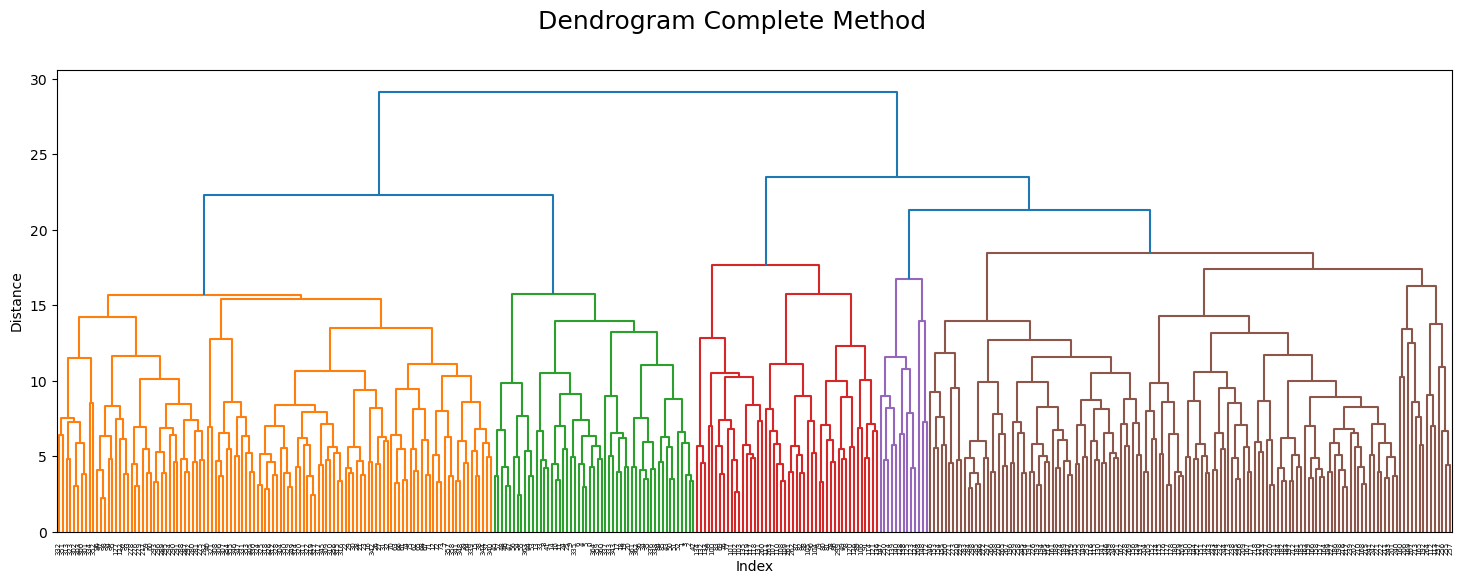

In [24]:
distance_single = linkage(dfPCA.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9',
'PCA10',
'PCA11',
'PCA12',
'PCA13',
'PCA14',
'PCA15',]],method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

Average Method

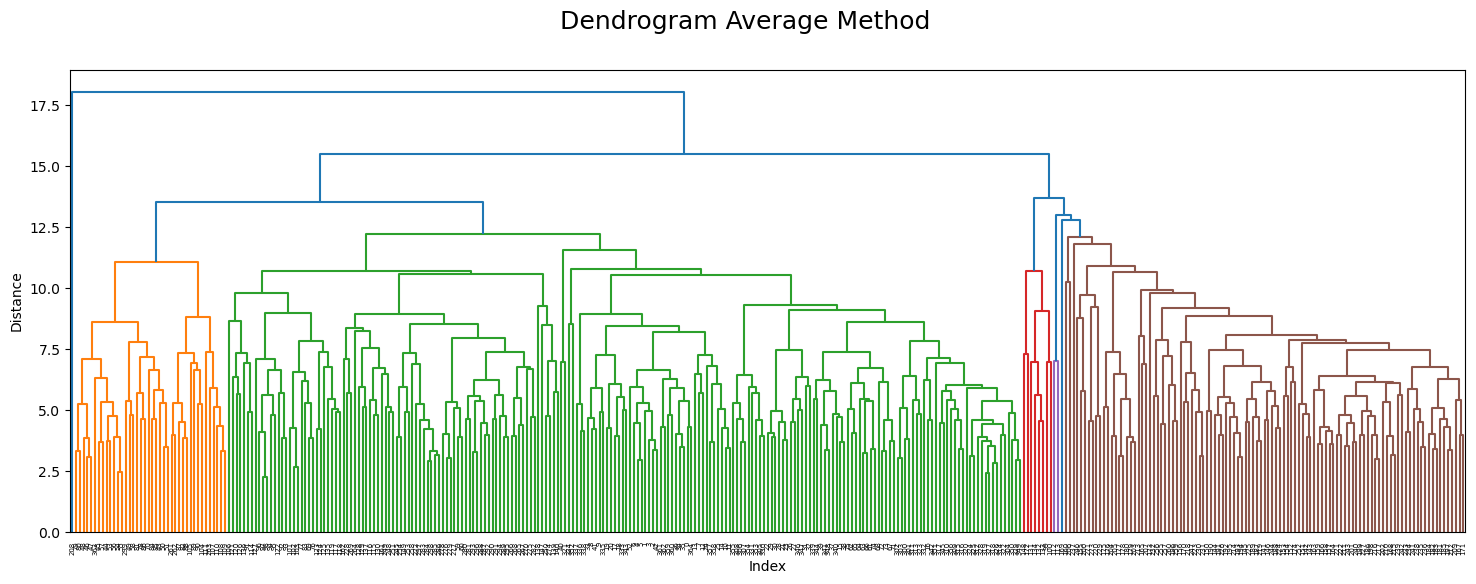

In [29]:
distance_single = linkage(dfPCA.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9',
'PCA10',
'PCA11',
'PCA12',
'PCA13',
'PCA14',
'PCA15',]],method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

Ward Method

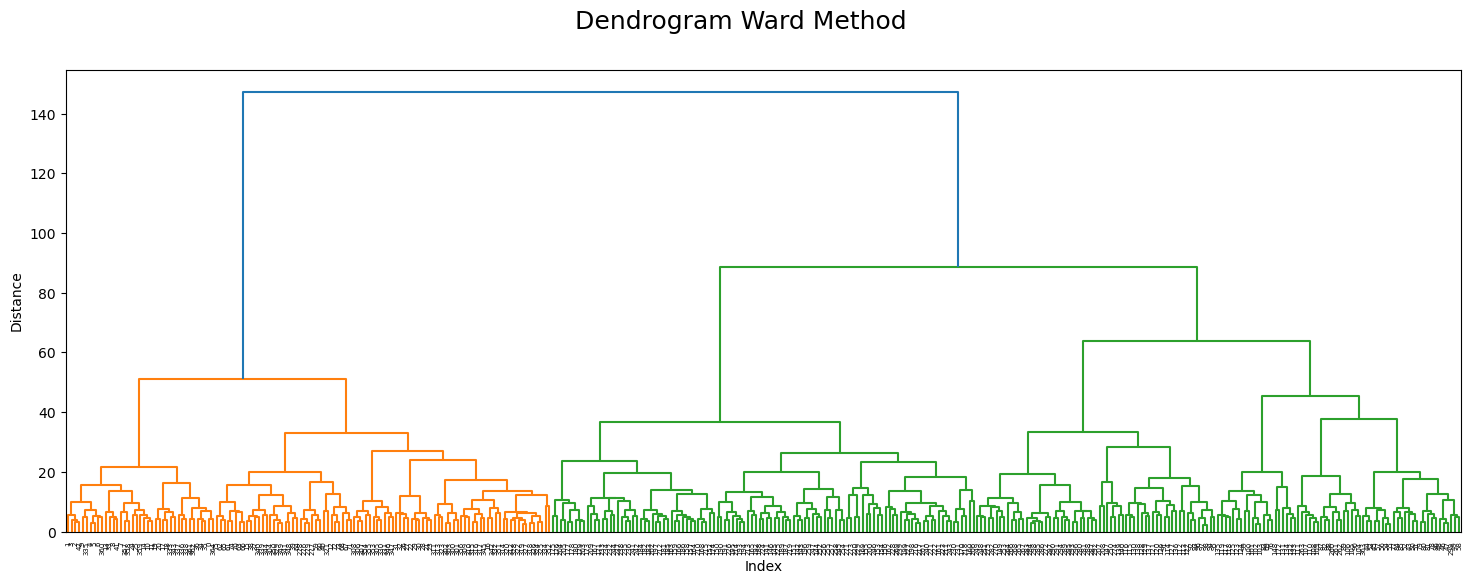

In [32]:
distance_single = linkage(dfPCA.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9',
'PCA10',
'PCA11',
'PCA12',
'PCA13',
'PCA14',
'PCA15',]],method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()